# Set up and Read in Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random 

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_FILE_PATH = 'drive/MyDrive/4B Projects/MSCI 598 (Deep Learning for NLP) Project/Code'
data = pd.read_csv(DATA_FILE_PATH+"/data.csv")

In [ ]:
data.head(5)

,Unnamed: 0,text,role,movie_clean,mbti
0,0,They do not!,Bianca Stratford,10 things i hate about you,ESFJ
1,1,They do to!,Cameron James,10 things i hate about you,INFP
2,2,I hope so.,Bianca Stratford,10 things i hate about you,ESFJ
3,3,She okay?,Cameron James,10 things i hate about you,INFP
4,4,Let's go.,Bianca Stratford,10 things i hate about you,ESFJ


In [ ]:
cleaned_data = data[data["mbti"] != 'XXXX']

# Distribution of MBTI Types
Code adapted from https://github.com/stefan-bergstein/NLP-and-ML-on-Myers-Briggs-Personality-Type-Dataset/blob/master/mbti-notebook.ipynb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


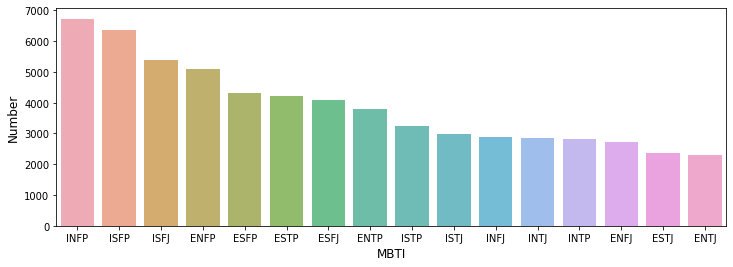

In [ ]:
mbti_types = cleaned_data['mbti'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(mbti_types.index, mbti_types.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('MBTI', fontsize=12)
plt.show()

In [ ]:
def get_types(row):
    t=row['mbti']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

cleaned_data = cleaned_data.join(cleaned_data.apply (lambda row: get_types (row),axis=1))
cleaned_data.head(5)

,Unnamed: 0,text,role,movie_clean,mbti,IE,NS,TF,JP
0,0,They do not!,Bianca Stratford,10 things i hate about you,ESFJ,0,0,0,1
1,1,They do to!,Cameron James,10 things i hate about you,INFP,1,1,0,0
2,2,I hope so.,Bianca Stratford,10 things i hate about you,ESFJ,0,0,0,1
3,3,She okay?,Cameron James,10 things i hate about you,INFP,1,1,0,0
4,4,Let's go.,Bianca Stratford,10 things i hate about you,ESFJ,0,0,0,1


In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", cleaned_data['IE'].value_counts()[0], " / ", cleaned_data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", cleaned_data['NS'].value_counts()[0], " / ", cleaned_data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", cleaned_data['TF'].value_counts()[0], " / ", cleaned_data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", cleaned_data['JP'].value_counts()[0], " / ", cleaned_data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 28845  /  33218
Intuition (N) – Sensing (S):		 32912  /  29151
Thinking (T) – Feeling (F):		 37544  /  24519
Judging (J) – Perceiving (P):		 36546  /  25517


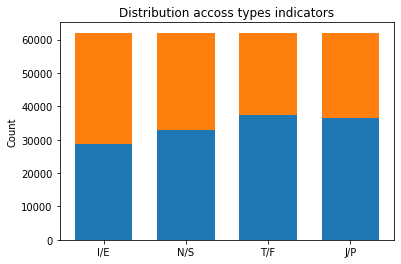

In [ ]:
N = 4
but = (cleaned_data['IE'].value_counts()[0], cleaned_data['NS'].value_counts()[0], cleaned_data['TF'].value_counts()[0], cleaned_data['JP'].value_counts()[0])
top = (cleaned_data['IE'].value_counts()[1], cleaned_data['NS'].value_counts()[1], cleaned_data['TF'].value_counts()[1], cleaned_data['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

## Split Into Train/Val/Test

In [ ]:
# Divide data into train/test split based on movie character.
unique_roles = list(cleaned_data["role"].unique())

random.seed(100)
val_roles = random.sample(unique_roles, round(len(unique_roles)*0.1))

remaining_roles = [role for role in unique_roles if role not in val_roles]
test_roles = random.sample(remaining_roles, round(len(unique_roles)*0.1))

train_roles = [role for role in remaining_roles if role not in test_roles]

In [ ]:
df_train = cleaned_data[cleaned_data["role"].isin(train_roles)]
df_val = cleaned_data[cleaned_data["role"].isin(val_roles)]
df_test = cleaned_data[cleaned_data["role"].isin(test_roles)]

In [ ]:
# Print number in each group.
print("Training: ", len(df_train))
print("Val: ", len(df_val))
print("Test: ", len(df_test))

Training:  50971
Val:  6471
Test:  4621


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


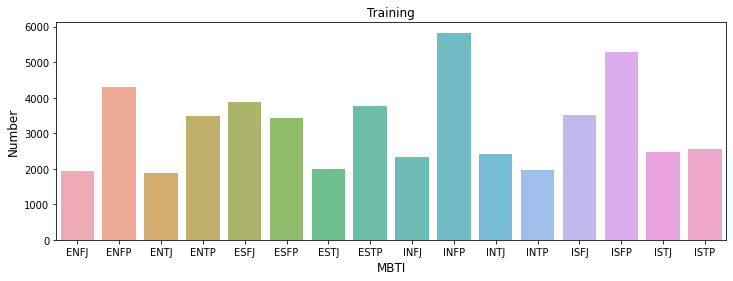

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


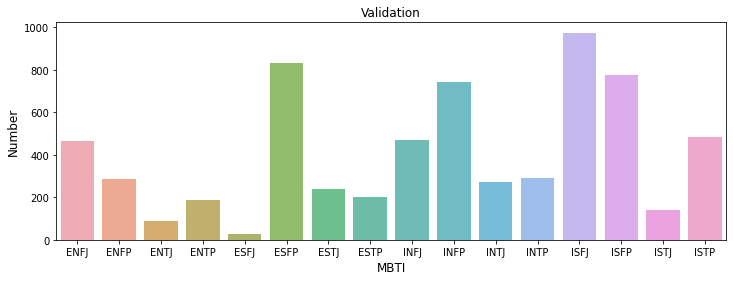

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


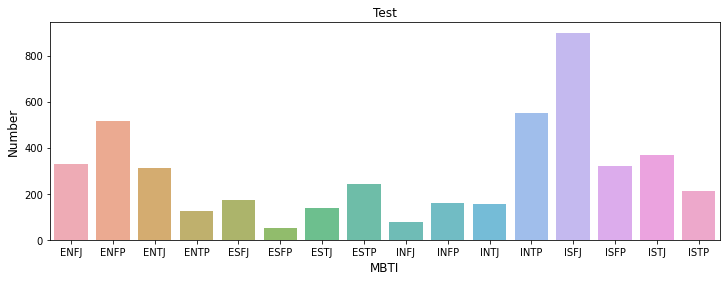

In [ ]:
df_train_mbti_types = df_train['mbti'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.barplot(df_train_mbti_types.index, df_train_mbti_types.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('MBTI', fontsize=12)
plt.title("Training")
plt.show()

df_val_mbti_types = df_val['mbti'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.barplot(df_val_mbti_types.index, df_val_mbti_types.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('MBTI', fontsize=12)
plt.title("Validation")
plt.show()

df_test_mbti_types = df_test['mbti'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.barplot(df_test_mbti_types.index, df_test_mbti_types.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('MBTI', fontsize=12)
plt.title("Test")
plt.show()

In [ ]:
# Gets the proportion of mbti within each group for train dataset.
train_mbti_proportion = df_train.groupby("mbti").count().sort_values("role", ascending=False) / df_train.count()
train_mbti_proportion

,IE,JP,NS,TF,Unnamed: 0,mbti,movie_clean,role,text
mbti,,,,,,,,,
INFP,0.114340,0.114340,0.114340,0.114340,0.114340,NaN,0.114340,0.114340,0.114333
ISFP,0.103471,0.103471,0.103471,0.103471,0.103471,NaN,0.103471,0.103471,0.103483
ENFP,0.084166,0.084166,0.084166,0.084166,0.084166,NaN,0.084166,0.084166,0.084175
ESFJ,0.076181,0.076181,0.076181,0.076181,0.076181,NaN,0.076181,0.076181,0.076190
ESTP,0.073924,0.073924,0.073924,0.073924,0.073924,NaN,0.073924,0.073924,0.073933
ISFJ,0.068666,0.068666,0.068666,0.068666,0.068666,NaN,0.068666,0.068666,0.068675
ENTP,0.068137,0.068137,0.068137,0.068137,0.068137,NaN,0.068137,0.068137,0.068106
ESFP,0.067097,0.067097,0.067097,0.067097,0.067097,NaN,0.067097,0.067097,0.067085
ISTP,0.049930,0.049930,0.049930,0.049930,0.049930,NaN,0.049930,0.049930,0.049917


In [ ]:
# Gets the proportion of mbti within each group for test dataset.
test_mbti_proportion = df_test.groupby("mbti").count().sort_values("role", ascending=False) / df_test.count()
test_mbti_proportion

,IE,JP,NS,TF,Unnamed: 0,mbti,movie_clean,role,text
mbti,,,,,,,,,
ISFJ,0.194547,0.194547,0.194547,0.194547,0.194547,NaN,0.194547,0.194547,0.194547
INTP,0.119238,0.119238,0.119238,0.119238,0.119238,NaN,0.119238,0.119238,0.119238
ENFP,0.111448,0.111448,0.111448,0.111448,0.111448,NaN,0.111448,0.111448,0.111448
ISTJ,0.079420,0.079420,0.079420,0.079420,0.079420,NaN,0.079420,0.079420,0.079420
ENFJ,0.070764,0.070764,0.070764,0.070764,0.070764,NaN,0.070764,0.070764,0.070764
ISFP,0.069682,0.069682,0.069682,0.069682,0.069682,NaN,0.069682,0.069682,0.069682
ENTJ,0.067518,0.067518,0.067518,0.067518,0.067518,NaN,0.067518,0.067518,0.067518
ESTP,0.052153,0.052153,0.052153,0.052153,0.052153,NaN,0.052153,0.052153,0.052153
ISTP,0.046310,0.046310,0.046310,0.046310,0.046310,NaN,0.046310,0.046310,0.046310


In [ ]:
# Save train/val/test split for later usage.
df_train.to_csv(DATA_FILE_PATH+'/train.csv')
df_val.to_csv(DATA_FILE_PATH+'/val.csv')
df_test.to_csv(DATA_FILE_PATH+'/test.csv')